In [167]:
# !pip install torch torchvision torchaudio

# Импорты

In [168]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [169]:
from IPython.display import display

# 4.1  Знакомство с PyTorch

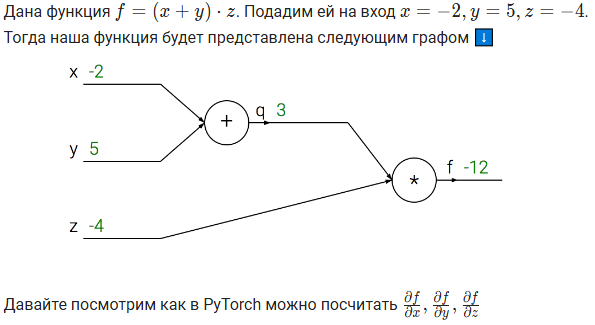

In [170]:
# Определим функцию как последовательность операций

x = torch.tensor(-2., requires_grad=True)
y = torch.tensor(5., requires_grad=True)
z = torch.tensor(-4., requires_grad=True)

q = x + y
f = q * z

display(f)

tensor(-12., grad_fn=<MulBackward0>)

In [171]:
# По описанной последовательности операций на лету строится граф вычислений, и обратный проход выполняется по нему
# Вызов метода backward() вычисляет градиенты для всех тензоров, у которых requires_grad == True

f.backward()

print('df/dz =', z.grad)
print('df/dx =', x.grad)
print('df/dy =', y.grad)

df/dz = tensor(3.)
df/dx = tensor(-4.)
df/dy = tensor(-4.)


In [172]:
# Попробуем создать несколько тензоров. Тензоры с вещественными компонентами типа float32 создаются следующим образом:

v = torch.empty(5)       # вектор из 5 элементов (заполнен "мусором")
m = torch.empty(3, 3)    # матрица формы (3,3) (заполнена "мусором")
x = torch.empty_like(m)  # матрица такой же формы как m (заполнена "мусором")

In [173]:
# Тензор можно также создать из списка Python или numpy-массива:

x = torch.tensor( [ [0, 1, 2], [3, 4, 5] ] )  # матрица размера (2, 3) типа int64
s = torch.tensor(123.)                        # скаляр (dim=0) типа float32
ss = torch.tensor(123, dtype=torch.double)    # тоже скаляр, но типа float64
e = torch.from_numpy(np.eye(3))               # единичная матрица размера (3, 3)

In [174]:
# Основные свойства тензора можно получить следующим образом:

print( x.dim(),  x.type(), x.numel() )   # размерность, тип элементов, их количество
print( x.size(), x.shape )               # torch.Size([2, 3])
print( tuple(x.shape), *x.shape )        # (2, 3)
print( s.item(), s.dim()  )              # 123 0

2 torch.LongTensor 6
torch.Size([2, 3]) torch.Size([2, 3])
(2, 3) 2 3
123.0 0


In [175]:
print(torch.sum(torch.arange(1, 6) ** 3))

tensor(225)


In [176]:
x = torch.tensor([[ [0, 1, 2], [3, 4, 5] ], [ [0, 1, 2], [3, 4, 5] ]])
x.size()

torch.Size([2, 2, 3])

# 4.2 PyTorch vs NumPy

Интерфейс `PyTorch` реализован подобно интерфесу `NumPy` для удобства использования. Главное различие между ними, что `NumPy` оперрирует `numpy.ndarray` массивами, а `PyTorch` &mdash; тензорами `pytorch.Tensor`. Напишем одни и те же операции на `NumPy` и `PyTorch`.

### NumPy

In [177]:
x = np.arange(16).reshape(4, 4)

In [178]:
print(f"Матрица X:\n{x}\n")
print(f"Размер: {x.shape}\n")
print(f"Добавление константы:\n{x + 5}\n")
print(f"X*X^T:\n{np.dot(x, x.T)}\n")
print(f"Среднее по колонкам:\n{x.mean(axis=-1)}\n")
print(f"Кумулятивная сумма по колонкам:\n{np.cumsum(x, axis=0)}\n")

Матрица X:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Размер: (4, 4)

Добавление константы:
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T:
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

Среднее по колонкам:
[ 1.5  5.5  9.5 13.5]

Кумулятивная сумма по колонкам:
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



### PyTorch

In [179]:
x = np.arange(16).reshape(4, 4)
x = torch.tensor(x, dtype=torch.float32)

display(x, x.dtype)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

torch.float32

ИЛИ

In [180]:
x = torch.arange(0, 16, dtype=torch.float32).view(4, 4)

display(x, x.dtype)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

torch.float32

In [181]:
print(f"Матрица X:\n{x}\n")
print(f"Размер: {x.shape}\n")
print(f"Добавление константы:\n{x + 5}")
print(f"X*X^T:\n{torch.matmul(x, x.transpose(1, 0))}\n")  # кратко: x.mm(x.t())
print(f"Среднее по колонкам:\n{torch.mean(x, dim=-1)}\n")
print(f"Кумулятивная сумма по колонкам:\n{torch.cumsum(x, dim=0)}")

Матрица X:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])

Размер: torch.Size([4, 4])

Добавление константы:
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T:
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])

Среднее по колонкам:
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])

Кумулятивная сумма по колонкам:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


Заметим, что некоторые названия методов отличаются и полной совместимости библиотек пока нет, и придется сново запоминать новые названия для некоторых функций.

Например, PyTorch имеет другое написание стандартных типов
 * `x.astype('int64') -> x.type(torch.LongTensor)`


Для более подробного ознакомления можно посмотреть на [таблицу](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) перевода методов из NumPy в PyTorch, а также заглянуть в [документацию](http://pytorch.org/docs/master/).

### Конвертация из NumPy в PyTorch (и обратно)

Можно переводить numpy-массив в torch-тензор и наоборот.

Например, сделаем из numpy-массива torch-тензор

In [182]:
# зададим numpy массив
x_np = np.array([2, 5, 7, 1])

# 1-й способ
x_torch = torch.tensor(x_np)
print(type(x_torch), x_torch)

# 2-й способ
x_torch = torch.from_numpy(x_np)
print(type(x_torch), x_torch)

<class 'torch.Tensor'> tensor([2, 5, 7, 1], dtype=torch.int32)
<class 'torch.Tensor'> tensor([2, 5, 7, 1], dtype=torch.int32)


Аналогично и с переводом обратно:  
функция `x.numpy()` переведет torch-тензор `x` в numpy-массив, причем типы переведутся соответственно таблице

In [183]:
x_np = x_torch.numpy()
print(type(x_np), x_np)

<class 'numpy.ndarray'> [2 5 7 1]


## Создание и инициализация тензоров

### Создание тензоров

In [184]:
x = torch.tensor([ [0,1,2], [3,4,6] ])
x

tensor([[0, 1, 2],
        [3, 4, 6]])

Тензор можно создавать при помощи конструкторов. Доступны следующие типы:  


*  HalfTensor   - `float16`
*  FloatTensor  - `float32`
*  DoubleTensor - `float64`


*  ShortTensor  - `int16`
*  IntTensor    - `int32`
*  LongTensor   - `int64`
*  CharTensor   - `int8`


*  ByteTensor   - `uint8`
*  BoolTensor   - `bool`

In [185]:
x = torch.Tensor(2, 4)
x, x.dtype

(tensor([[ 3.2923e-22,  1.1827e-42, -3.6471e-01, -2.1569e-01],
         [-2.7059e-01, -3.6471e-01, -3.7255e-01, -3.6471e-01]]),
 torch.float32)

In [186]:
x = torch.FloatTensor(2, 4)
display(x)
display(x.dtype)

tensor([[3.2924e-22, 1.1827e-42, 1.4013e-45, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 4.5098e-01, 3.6471e-01]])

torch.float32

In [187]:
x = torch.HalfTensor(2, 4)
display(x)
display(x.dtype)

tensor([[0.0000e+00, 3.0312e+00, 0.0000e+00, 1.7500e+00],
        [0.0000e+00, 1.7500e+00, 1.5318e-05, 1.5318e-05]], dtype=torch.float16)

torch.float16

In [188]:
x = torch.DoubleTensor(2, 4)
display(x)
display(x.dtype)

tensor([[1.7912e-311,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],
       dtype=torch.float64)

torch.float64

In [189]:
x = torch.IntTensor(2, 4)
display(x)
display(x.dtype)

tensor([[ 1058253479,  1062032097,  1052803392,  1064181924],
        [ 1053728979, -1090157178, -1092163866, -1095058758]],
       dtype=torch.int32)

torch.int32

In [190]:
x = torch.ShortTensor(2, 4)
display(x)
display(x.dtype)

tensor([[  257,   257,     0,     0],
        [    0, 16128,     0,     0]], dtype=torch.int16)

torch.int16

In [191]:
x = torch.LongTensor(2, 4)
display(x)
display(x.dtype)

tensor([[3625418361472,             0,             0,             0],
        [            0,             0,             0,             0]])

torch.int64

Тип элементов можно также указывать в методе `empty()` или функциях инициализации

In [192]:
x_1 = torch.empty(2,3, dtype=torch.float64)
x_2 = torch.empty(2,3, dtype=torch.double)
y_1 = torch.zeros(2,3, dtype=torch.int64)
y_2 = torch.zeros(2,3, dtype=torch.long)

x_1, x_2, y_1, y_2

(tensor([[-1.8602e-14,  9.7636e-14,  1.1238e-16],
         [ 5.5522e-12,  3.6678e-16, 9.8813e-324]], dtype=torch.float64),
 tensor([[2.2732e-13, 4.9866e-13, 6.4214e-13],
         [4.4318e-13, 2.7349e-13, 0.0000e+00]], dtype=torch.float64),
 tensor([[0, 0, 0],
         [0, 0, 0]]),
 tensor([[0, 0, 0],
         [0, 0, 0]]))

Размер элемента

In [193]:
y_2.element_size()

8

### Инициализация значений

In [194]:
y = torch.zeros (2, 3)                   # матрица 2x3 из нулей  типа float32
x = torch.zeros_like(y)                  # такой же формы как y из нулей

x = torch.ones (2, 3)                    # матрица 2x3 из единиц
x = torch.ones_like(y)                   # такой же формы как y из единиц

x = torch.full((2, 3), 3.14159265)       # заполнить матрицу 2x3 числом pi

x = torch.eye   (3)                      # единичная матрица 3x3
x = torch.eye   (2,3)                    # "единичная" не квадратная [[1., 0., 0.],
                                         #                            [0., 1., 0.]]
x = torch.linspace(0,2,5)                # [0.0,0.5,1.0,1.5,2.0] [beg,end], num

x = torch.rand (2, 3)                    # 2x3 равномерно случ.матрица [0...1]
x = torch.randn(2, 3)                    # 2x3 нормально  случ.матрица (mean=0, var=1)

x = torch.empty(3).uniform_(0, 1)        # вектор с равномерным распределением [0..1]
x = torch.empty(3).normal_(mean=0,std=1) # вектор с нормальным распределением

In [195]:
x = torch.arange(4)                      # [0,1,2,3]             [0,end)
x = torch.arange(2, 14, 3)               # [2,5,8,11]            [beg,end), step

x = torch.randperm(10)                   # [8,6,9,3,5,0,1,4,7,2] - случ.перестановка
x = torch.randint (1, 10, (2,3))         # 2x3 случ.целых из интервала [1...10)

## Операции над тензорами

### Арифметические операции

In [196]:
x = torch.ones(2, 3).to(torch.int32)
x

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

In [197]:
y = x * -1
y

tensor([[-1, -1, -1],
        [-1, -1, -1]], dtype=torch.int32)

In [198]:
# x.add(y)
x + y

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [199]:
# x.sub(y)
x - y

tensor([[2, 2, 2],
        [2, 2, 2]], dtype=torch.int32)

In [200]:
# x.mul(y)
x * y

tensor([[-1, -1, -1],
        [-1, -1, -1]], dtype=torch.int32)

In [201]:
# x.div(y)
x / y

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [202]:
a = x.detach().clone()
a

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

In [203]:
a.add_(y)
a

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [204]:
# `x` не изменился, потому что его "склонировали" в `a`
x

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

In [205]:
y.abs_()
y

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)

### Логические операции

In [206]:
z = torch.FloatTensor(
    [
     [-1, 1, 1],
     [2, -1, -1]
    ]
)
z

tensor([[-1.,  1.,  1.],
        [ 2., -1., -1.]])

In [207]:
x > z

tensor([[ True, False, False],
        [False,  True,  True]])

In [208]:
x == z

tensor([[False,  True,  True],
        [False, False, False]])

In [209]:
x != z

tensor([[ True, False, False],
        [ True,  True,  True]])

In [210]:
mask = (x > z)
mask

tensor([[ True, False, False],
        [False,  True,  True]])

In [211]:
x[mask]

tensor([1, 1, 1], dtype=torch.int32)

### Скалярное произведение

In [212]:
x = torch.arange(1, 4).reshape(1, 3)
x

tensor([[1, 2, 3]])

In [213]:
y = -1 * x
y[0][1].abs_()
y

tensor([[-1,  2, -3]])

In [214]:
x @ y.T

tensor([[-6]])

In [215]:
torch.mm(x, y.T)

tensor([[-6]])

## Приведение типов

In [216]:
a = torch.IntTensor([1, 4, -2])
a

tensor([ 1,  4, -2], dtype=torch.int32)

In [217]:
a = a.type_as(torch.HalfTensor())
a

tensor([ 1.,  4., -2.], dtype=torch.float16)

In [218]:
a = a.to(torch.int32)
a

tensor([ 1,  4, -2], dtype=torch.int32)

In [219]:
np.random.seed(42)

a = np.random.rand(5, 3) # создали случайную матрицу
a

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985],
       [0.83244264, 0.21233911, 0.18182497]])

In [220]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [221]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.37454012 5.95071431 5.73199394]
 [5.59865848 5.15601864 5.15599452]
 [5.05808361 5.86617615 5.60111501]
 [5.70807258 5.02058449 5.96990985]
 [5.83244264 5.21233911 5.18182497]]



## Задание 1

Умножьте матрицу `а` на транспонированную матрицу `а`.  

Чему равен самый первый элемент результата?  
Ответ округлите до сотых.

In [222]:
# ваш код здесь
a = torch.from_numpy(a)
a @ a.T

tensor([[1.5800, 0.4867, 1.2853, 0.9947, 0.6468],
        [0.4867, 0.4071, 0.2637, 0.5784, 0.5598],
        [1.2853, 0.2637, 1.1150, 0.6420, 0.3416],
        [0.9947, 0.5784, 0.6420, 1.4425, 0.7702],
        [0.6468, 0.5598, 0.3416, 0.7702, 0.7711]], dtype=torch.float64)

In [223]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
tensor([0.6857, 0.3036, 0.5085, 0.5662, 0.4089], dtype=torch.float64)



In [224]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
torch.Size([3, 5])



## Задание 2

При помощи *NumPy* посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [225]:
# ваш код здесь
np.sum(np.arange(1, 10e3 + 1)**2)

333383335000.0

Аналогичные операции в *PyTorch* выглядят следующим образом, синтаксис отличается, но совсем немного:

In [226]:
x = torch.rand(5, 3)
x

tensor([[0.2783, 0.4820, 0.8198],
        [0.9971, 0.6984, 0.5675],
        [0.8352, 0.2056, 0.5932],
        [0.1123, 0.1535, 0.2417],
        [0.7262, 0.7011, 0.2038]])

In [227]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [228]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.2783, 5.4820, 5.8198],
        [5.9971, 5.6984, 5.5675],
        [5.8352, 5.2056, 5.5932],
        [5.1123, 5.1535, 5.2417],
        [5.7262, 5.7011, 5.2038]])



In [229]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[0.9817, 1.0793, 0.8178, 0.3034, 0.7071],
        [1.0793, 1.8041, 1.3130, 0.3564, 1.3294],
        [0.8178, 1.3130, 1.0918, 0.2688, 0.8716],
        [0.3034, 0.3564, 0.2688, 0.0946, 0.2384],
        [0.7071, 1.3294, 0.8716, 0.2384, 1.0605]])

X*X^T  (2):
tensor([[0.9817, 1.0793, 0.8178, 0.3034, 0.7071],
        [1.0793, 1.8041, 1.3130, 0.3564, 1.3294],
        [0.8178, 1.3130, 1.0918, 0.2688, 0.8716],
        [0.3034, 0.3564, 0.2688, 0.0946, 0.2384],
        [0.7071, 1.3294, 0.8716, 0.2384, 1.0605]])



In [230]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.5267, 0.7544, 0.5447, 0.1692, 0.5437])



In [231]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в *NumPy*.


При помощи *PyTorch* посчитаем сумму квадратов натуральных чисел от 1 до 10000.

In [232]:
torch.sum(torch.range(1, 10000) ** 2)

C:\Users\kuche\AppData\Local\Temp\ipykernel_4388\2248688129.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.sum(torch.range(1, 10000) ** 2)


tensor(3.3338e+11)

Создаем тензоры в *PyTorch* и снова изучаем базовые операции

In [233]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[3.3424e-22, 1.1827e-42, 3.0000e+00],
        [4.0000e+00, 5.0000e+00, 6.0000e+00],
        [7.0000e+00, 8.0000e+00, 9.0000e+00],
        [1.0000e+01, 1.1000e+01, 1.2000e+01],
        [1.3000e+01, 1.4000e+01, 1.5000e+01]])


In [234]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.6511, 0.7745, 0.4369],
        [0.5191, 0.6159, 0.8102],
        [0.9801, 0.1147, 0.3168],
        [0.6965, 0.9143, 0.9351],
        [0.9412, 0.5995, 0.0652]])


In [235]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [236]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [237]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [238]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[-0.0877, -0.5382,  0.5880],
        [ 1.6059,  0.4279, -0.6776],
        [ 1.0422, -1.9513,  0.4186],
        [ 3.3214,  0.8764,  1.2345],
        [-1.1642, -0.0240,  0.6480]]) torch.Size([5, 3])


## Задание 3

Сгенерируйте два тензора: `x` и `y` размера 5 на 3 со случайными числами.
Вычислите сумму тензоров `x` и `y`.

В ответе напишите значение первой координаты в полученной суммы, округленной до сотых.

In [239]:
import torch

torch.manual_seed(42)

x = torch.rand(size=(5, 3))
y = torch.rand(size=(5, 3))

z = x + y
z[0, 0]

tensor(1.3117)

In [ ]:
print(x * y) # поэлементное умножение

tensor([[0.3789, 0.8102, 0.2197],
        [0.2557, 0.2450, 0.1620],
        [0.1132, 0.2356, 0.7824],
        [0.0140, 0.2519, 0.2130],
        [0.1733, 0.3106, 0.0046]])


## Задание 4

Умножьте матрицу `x` на транспонированную матрицу `y`.

В ответ напишите последний элемент (правый нижний) полученной матрицы.  
Ответ округлите до сотых.

In [ ]:
# your code here

z = x @ y.T
z[-1, -1]

tensor(0.4885)

In [ ]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [ ]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга

torch.Size([5, 3])


In [ ]:
a = torch.rand((1,3))
a

tensor([[0.9516, 0.0753, 0.8860]])

In [ ]:
a.squeeze(0)

tensor([0.9516, 0.0753, 0.8860])

Мы также можем делать обычные срезы и переводить матрицы назад в *NumPy*:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


In [ ]:
a = np.array([1,2,3,4])
b = np.array([[5],[6],[7],[8]])

a.shape, b.shape

((4,), (4, 1))

In [ ]:
a @ b

array([70])

In [ ]:
# b @ a

# 4.3 Линейная регрессия с PyTorch

Будем предсказывать стоимость домов в Калифорнии при помощи линейной регрессии с использованием *PyTorch*.

In [ ]:
import torch
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing(as_frame=True)
california.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Для простоты в этом ноутбуке будем обучать одномерную линейную регрессию - будем предсказывать стоимость домов по среднему доходу жильцов дома (`MedInc`).

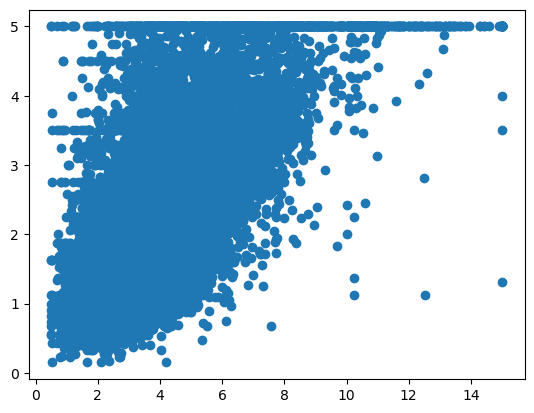

In [ ]:
plt.scatter(california.data['MedInc'], california.target)
plt.show();

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

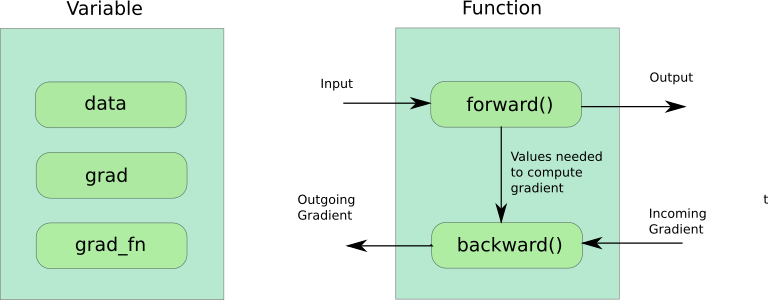

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиент для всех тензоров, у которых `requires_grad=True`.

Будем обучать линейную регрессию, которая делает предсказание по формуле
$$a(x) = w\cdot x + b.$$

Здесь w и b - неизвестные веса, по ним в процессе обучения модели градиентным спуском нужно вычислять градиент функции потерь, поэтому при использовании pytorch мы создаем тензоры w и b и указываем, что необходимо будет считать по ним градиент.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(california.data['MedInc'] / california.data['MedInc'].max(), dtype=torch.float32) # нормируем признак для стабилизации сходимости
y = torch.tensor(california.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

Запишем формулу для предсказания модели, а также формулу для вычисления ошибки (MSE).

In [ ]:
y_pred = w * x + b                 # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами

loss.backward()                    # считаем градиенты

In [ ]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появиться
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-0.9980])
dL/db = 
 tensor([-3.1608])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data, b.data

(tensor([0.5832]), tensor([0.3376]))

In [ ]:
w.grad

tensor([-0.9980])

Обучим модель методом градиентного спуска:
* на каждой итерации вычисляем loss и считаем от него градиент (по w и b)
* затем обновляем веса по формуле градиентного спуска
$$w_{new} = w_{old} - \eta\cdot\nabla Loss(w_{old})$$

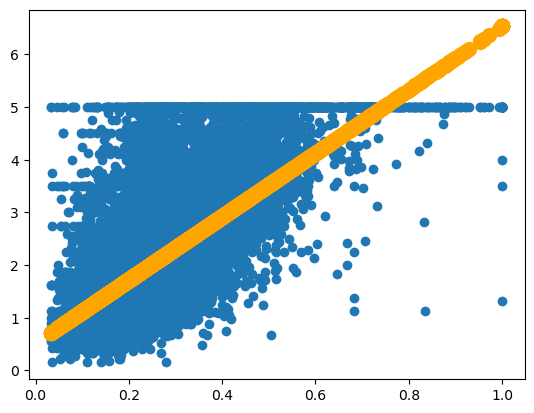

loss =  0.7021855


In [ ]:
from IPython.display import clear_output

for i in range(200):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = 0.5
    w.data -= 0.5 * w.grad
    b.data -= 0.5 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


Мы обучили простейшую модель (это еще, конечно, не нейронная сеть), используя pytorch!

Теперь вы знаете про PyTorch достаточно, чтобы начать тренировать с помощью этого фреймворка нейронные сети. До встречи!

### Полезные ноутбуки - можно посмотреть:

* [Введение в PyTorch](https://colab.research.google.com/drive/1_OWlyup9twiBz6HtHAjoIwm7bmrZHUO2)
* [Обучение нейросетей в PyTorch](https://colab.research.google.com/drive/1-YE_oAapPlsaxGKG5AR7Ix3_vTQBCo4N)

# 4.3 Задача классификации (MNIST)

В этом ноутбуке вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете MNIST.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset

train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:06<00:00, 1.55MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 241kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.14MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]


In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2358
Epoch [1/5], Step [200/600], Loss: 0.3698
Epoch [1/5], Step [300/600], Loss: 0.2805
Epoch [1/5], Step [400/600], Loss: 0.2002
Epoch [1/5], Step [500/600], Loss: 0.1685
Epoch [1/5], Step [600/600], Loss: 0.1575
Epoch [2/5], Step [100/600], Loss: 0.1495
Epoch [2/5], Step [200/600], Loss: 0.1687
Epoch [2/5], Step [300/600], Loss: 0.0715
Epoch [2/5], Step [400/600], Loss: 0.0474
Epoch [2/5], Step [500/600], Loss: 0.0495
Epoch [2/5], Step [600/600], Loss: 0.0483
Epoch [3/5], Step [100/600], Loss: 0.0244
Epoch [3/5], Step [200/600], Loss: 0.0566
Epoch [3/5], Step [300/600], Loss: 0.0260
Epoch [3/5], Step [400/600], Loss: 0.0250
Epoch [3/5], Step [500/600], Loss: 0.0300
Epoch [3/5], Step [600/600], Loss: 0.0513
Epoch [4/5], Step [100/600], Loss: 0.0785
Epoch [4/5], Step [200/600], Loss: 0.0318
Epoch [4/5], Step [300/600], Loss: 0.0564
Epoch [4/5], Step [400/600], Loss: 0.1359
Epoch [4/5], Step [500/600], Loss: 0.0303
Epoch [4/5], Step [600/600], Loss:

In [ ]:
# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the test images: 97.98 %


# 4.4 Домашнее задание

В этом домашнем задании вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете CIFAR-10. В этом датасете содержатся цветные (трехканальные) изображения размера 32 на 32 пикселя. Изображения относятся к 10 классам.

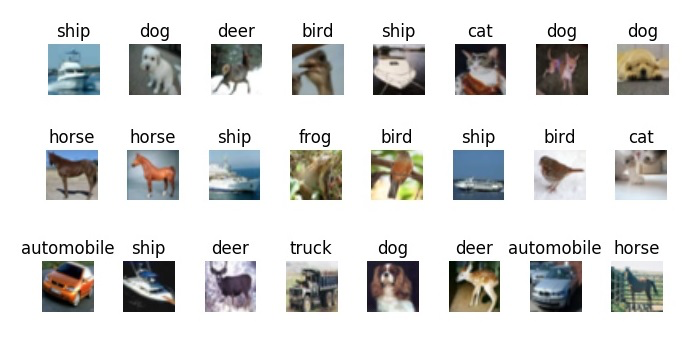

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

## Задание

Задайте гиперпаметры для нейронной сети:

* `input_size` - число входных признаков (равно число пикселей * число каналов). Вычислите `input_size` самостоятельно.

* `hidden_size` - число нейронов на скрытом слое сети. Поставьте 500.

* `num_classes` - число классов. Задайте самостоятельно.

Чему равен `input_size`?


In [ ]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 32 * 32 * 3 # ширина * высота * число каналов (RGB)
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
input_size

3072

Загрузим данные и масштабируем их.

In [ ]:
# CIFAR dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

## Задание

Сколько объектов в `train_dataset`?

In [ ]:
len(train_dataset)

50000

Создадим data-loaders.

In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
len(train_loader) * batch_size

50000

## Задание

Допишите метод `forward`. Архитектура сети следующая:

1) Полносвязный слой `fc1`

2) Функция активации ReLU

3) Полносвязный слой `fc2`

Сколько нейронов поступает на вход (`in_features`) в слой `fc2`?

In [ ]:
# Fully connected neural network
# 1024, 512, 256, 128, 64
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Задайте Loss - кросс-энтропию и оптимизатор - Adam с learning_rate, определенным константой из первого задания.

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Задание

Допишите цикл для обучения модели:

1) На вход в цикле подается объект `images` - батч, состоящий из картинок, вытянутых в вектор. Объект `images` переносится на device (на видеокарту, если есть).

2) Каждую сотую итерацию добавляйте значение функции потерь в список log_loss. Значние функции потерь можно посмотреть в `loss.data` (не забудьте перевести tensor в np.array при помощи метода `.numpy()`, а если делаете вычисления на gpu, то `.cpu().numpy()`)

Чему равен loss на последней итерации после отработки цикла? Ответ округлите до целого числа.

In [ ]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            # your code here
            loss_log.append(loss.data.numpy())

Epoch [1/10], Step [100/500], Loss: 1.7296
Epoch [1/10], Step [200/500], Loss: 1.3804
Epoch [1/10], Step [300/500], Loss: 1.7036
Epoch [1/10], Step [400/500], Loss: 1.5316
Epoch [1/10], Step [500/500], Loss: 1.5217
Epoch [2/10], Step [100/500], Loss: 1.7291
Epoch [2/10], Step [200/500], Loss: 1.4651
Epoch [2/10], Step [300/500], Loss: 1.6245
Epoch [2/10], Step [400/500], Loss: 1.2835
Epoch [2/10], Step [500/500], Loss: 1.4993
Epoch [3/10], Step [100/500], Loss: 1.2793


KeyboardInterrupt: 

In [ ]:
loss_log[-1]

array(0.89991987, dtype=float32)

## Задание  

Нарисуйте график изменения лосса, используя список `loss_log`.

Что можно сказать по этому графику?

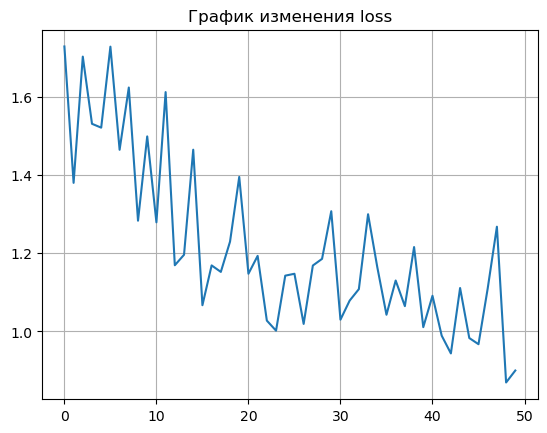

In [ ]:
from matplotlib import pyplot as plt

plt.plot(loss_log)

plt.title('График изменения loss')

plt.grid('all')

plt.show();

## Задание

Допишите цикл тестирования модели:

1) На вход, как и в предыдущем задании, подайте такой же тензор `images` и перенесите его на device

2) Также задайте `labels`

3) Сделайте прогноз модели на мини-батче `images` - результат будет в `outputs`

4) В конце вычислите `accuracy` и выведите ее на экран по формуле $100 \cdot correct / total$

Чему равна `accuracy`? Ответ округлите до целого числа.

In [ ]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # your code for accuracy here
    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the test images: 51.94 %


# 5.1 Препроцессинг данных и инициализация весов

## Нормировка данных в PyTorch

In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np


# Создание класса набора данных
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

# Генерация примера данных 
data = np.random.randn(100, 3)  # Данные размерности 100x3 (одномерные, поэтому пример будет с Lambda)

# Преобразование numpy массива в тензор
data = torch.tensor(data, dtype=torch.float32)


# Вариант 1: Явная нормализация 

# Считаем среднее и std:
means = data.mean(dim=0, keepdim=True)
stds = data.std(dim=0, keepdim=True)
normalized_data = (data - means) / stds

# Создание экземпляра Dataset с нормализованными данными
dataset1 = CustomDataset(normalized_data)

# Создание DataLoader для нормализованных данных
dataloader1 = DataLoader(dataset1, batch_size=4, shuffle=False)

# --- Вариант 2: Нормализация с использованием transforms ---

# Создание transform для нормализации
transform = transforms.Compose([
    transforms.Lambda(lambda x: (x - data.mean(dim=0, keepdim=True)) / data.std(dim=0, keepdim=True))
])

# Создание экземпляра Dataset с оригинальными данными и transform
dataset2 = CustomDataset(data, transform=transform)

# Создание DataLoader для данных с transform
dataloader2 = DataLoader(dataset2, batch_size=4, shuffle=False)

# --- Тестирование dataloader'ов ---

print("Результаты из dataloader1 (явная нормализация):")
for batch in dataloader1:
    print(batch)
    break  # Печатаем только один батч

print("\nРезультаты из dataloader2 (нормализация через transform):")
for batch in dataloader2:
    print(batch)
    break  # Печатаем только один батч


# Примечание:

# shuffle=False— здесь поставлен, чтобы вы убедились в одинаковости результатов. В общем смысле, особенно при обучении, данные лучше перемешивать. 

Результаты из dataloader1 (явная нормализация):
tensor([[ 1.6132,  0.2978,  1.1244],
        [ 2.0756,  1.7846, -0.8697],
        [ 0.8239, -0.2610,  0.0214],
        [ 0.3007,  0.0383,  1.6092]])

Результаты из dataloader2 (нормализация через transform):
tensor([[[ 1.6132,  0.2978,  1.1244]],

        [[ 2.0756,  1.7846, -0.8697]],

        [[ 0.8239, -0.2610,  0.0214]],

        [[ 0.3007,  0.0383,  1.6092]]])


## Инициализация весов в PyTorch

In [ ]:
# import torch
# import torch.nn as nn

# # Задаем размерности входа и выхода для линейного слоя
# input_size = 64
# output_size = 128

# # Создаем линейный слой
# linear_layer = nn.Linear(input_size, output_size)


# # Применяем Xavier инициализацию к весам этого слоя
# nn.init.xavier_uniform_(linear_layer.weight)

# # Применяем He инициализацию к весам этого слоя с равномерным распределением
# nn.init.kaiming_uniform_(model.fc.weight, mode='fan_in', nonlinearity='relu')

# # Применяем He инициализацию к весам этого слоя с нормальным распределением
# nn.init.kaiming_normal_(model.fc.weight, mode='fan_in', nonlinearity='relu')

# 5.2 Ограничения на веса

Gradient Clipping в PyTorch

In [ ]:
import torch
import torch.nn as nn

# Создаем модель
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Определяем функцию потерь
criterion = nn.MSELoss()

# Задаем оптимизатор
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Задаем параметры gradient clipping
max_grad_norm = 1.0  # Максимальная допустимая норма градиентов
clip_type = 'norm'  # Может быть 'norm' или 'value'

# Пример обучения с gradient clipping
inputs = torch.randn(1, 10)
targets = torch.randn(1, 1)

# Прямой проход
outputs = model(inputs)
loss = criterion(outputs, targets)

# Обратное распространение ошибки
optimizer.zero_grad()
loss.backward()

# Применение gradient clipping
if clip_type == 'norm':
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
elif clip_type == 'value':
    torch.nn.utils.clip_grad_value_(model.parameters(), max_grad_norm)

# Обновление весов
optimizer.step()
# Мы пользуемся методами clip_grad_norm_() или clip_grad_value_() для ограничения нормы градиентов или их значений.

# 5.3 Dropout в PyTorch

In [ ]:
# Пример архитектуры с Dropout-слоями

class ExampleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(60, 60)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.layer2 = nn.Linear(60, 30)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)
        self.output = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()
                                              
    def forward(self, x):
        x = self.act1(self.layer1(x))        
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.output(x))
        return x

# 5.4 Batch and Layer Normalisation

## BatchNorm в PyTorch

In [ ]:
# Слой BatchNorm
m = nn.BatchNorm2d(num_features=100)

input = torch.randn(20, 100, 35, 45)
output = m(input)

# 5.5 Домашнее задание

В этом домашнем задании вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете CIFAR-10. -->

Это домашнее задание оформлено в не совсем традиционном формате. Не хочется заставлять вас копировать код. Вы будете менять уже существующую архитектуру, а затем отвечать на вопросы.

## Задание 1

Запустите данный изначально код и замерьте качество (accuracy) на тестовых данных. Ответ округлите до целого числа.

## Задание 2

Добавьте еще один полносвязный слой (перед выходным) из 100 нейронов + функцию активации ReLU и запустите обучение. Выберите в ответе accuracy, наиболее близкую к полученной на тесте.

## Задание 3

Теперь обучите полносвязную сеть с несколькими линейными слоями с числом нейронов: 1024, 512, 256, 128, 64 соответственно + функцией ReLU на выходе из каждого внутреннего слоя. В ответе - accuracy, округленная до целого числа.

## Задание 4

К архитектуре из предыдущего задания добавьте Dropout(0.2) перед слоями из 1024 и 256 нейронов. Увеличилась ли accuracy по сравнению с предыдущим заданием?

## Задание 5

Уберите Dropout, но добавьте BatchNorm перед входом в те же линейные слои. Увеличилась ли accuracy по сравнению с заданием 3?

## Задание 6

Теперь пробуйте что угодно:
* разное число линейных слоев
* разные функции активации (вместо ReLU)
* комбинации Dropout / BatchNorm
* можете попробовать умные инициализации весов и другие трюки из урока

Цель - добиться наибольшей accuracy на тесте.

In [240]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

def seed():
  np.random.seed(0)
  random.seed(0)
  torch.manual_seed(0)

seed()

In [241]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 3072
num_classes = 10
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [242]:
# MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

In [243]:
# Data loader
seed()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [244]:
# Fully connected neural network

class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.bn1 = nn.BatchNorm1d(input_size)
        self.dropout = nn.Dropout(p=0.2)
        self.fc1 = nn.Linear(input_size, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.bn3 = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(256, 128)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(128, 64)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(64, num_classes)
#        self.apply(self._init_weights)

    def _init_weights(self, module): # метод для различных "умных" инициализаций весов
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=0.15)
            if module.bias is not None:
                module.bias.data.zero_()

    def forward(self, x):
        out = self.bn1(x)
        # out = self.dropout(x)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.bn3(out)
        # out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)

        return out

model = NeuralNet(input_size, num_classes).to(device)

model

NeuralNet(
  (bn1): BatchNorm1d(3072, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (relu2): ReLU()
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (relu5): ReLU()
  (fc6): Linear(in_features=64, out_features=10, bias=True)
)

In [245]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [246]:
seed()

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            loss_log.append(loss.data.cpu().numpy())

Epoch [1/10], Step [100/1563], Loss: 2.2668
Epoch [1/10], Step [200/1563], Loss: 1.9890
Epoch [1/10], Step [300/1563], Loss: 1.7501
Epoch [1/10], Step [400/1563], Loss: 1.8288
Epoch [1/10], Step [500/1563], Loss: 1.8968
Epoch [1/10], Step [600/1563], Loss: 1.8152
Epoch [1/10], Step [700/1563], Loss: 1.6707
Epoch [1/10], Step [800/1563], Loss: 1.8200
Epoch [1/10], Step [900/1563], Loss: 1.6885
Epoch [1/10], Step [1000/1563], Loss: 1.5130
Epoch [1/10], Step [1100/1563], Loss: 1.8525
Epoch [1/10], Step [1200/1563], Loss: 1.6674
Epoch [1/10], Step [1300/1563], Loss: 1.6412
Epoch [1/10], Step [1400/1563], Loss: 1.6629
Epoch [1/10], Step [1500/1563], Loss: 1.5954
Epoch [2/10], Step [100/1563], Loss: 1.5476
Epoch [2/10], Step [200/1563], Loss: 1.3834
Epoch [2/10], Step [300/1563], Loss: 1.3505
Epoch [2/10], Step [400/1563], Loss: 1.7730
Epoch [2/10], Step [500/1563], Loss: 1.4253
Epoch [2/10], Step [600/1563], Loss: 1.6892
Epoch [2/10], Step [700/1563], Loss: 1.4929
Epoch [2/10], Step [800/15

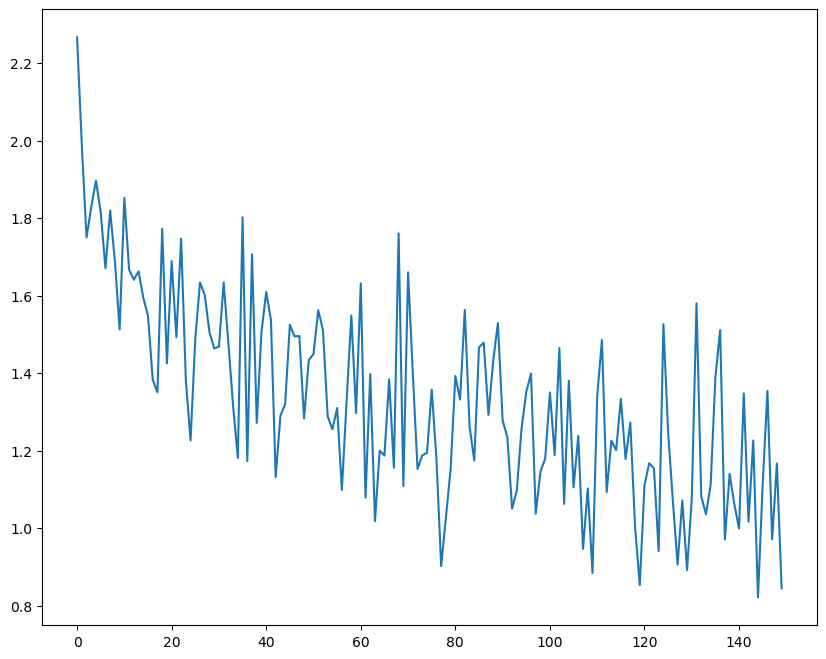

In [247]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(loss_log);

In [248]:
seed()

# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32*32*3).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the test images: 53.23 %
